In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('../input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df=df.drop('Loan_ID',axis=1)

In [7]:
df.dropna(how='any',inplace=True)

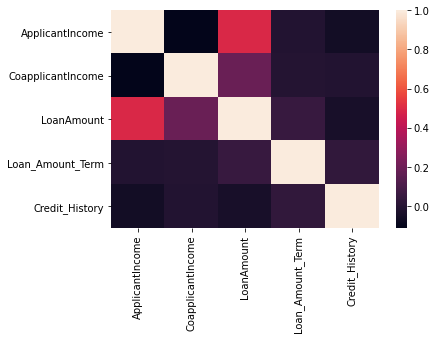

In [8]:
sns.heatmap(df.corr())

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

In [10]:
df1=pd.get_dummies(df['Gender'],drop_first=True)
df=pd.concat([df1,df],axis=1)

In [11]:
df2=pd.get_dummies(df['Married'],drop_first=True)
df=pd.concat([df2,df],axis=1)

In [12]:
df3=pd.get_dummies(df['Dependents'],drop_first=True)
df=pd.concat([df3,df],axis=1)

In [13]:
df4=pd.get_dummies(df['Self_Employed'],drop_first=True)
df=pd.concat([df4,df],axis=1)

In [14]:
df5=pd.get_dummies(df['Education'],drop_first=True)
df=pd.concat([df5,df],axis=1)

In [15]:
df6=pd.get_dummies(df['Property_Area'],drop_first=True)
df=pd.concat([df6,df],axis=1)

In [16]:
df.head()

,Semiurban,Urban,Not Graduate,Yes,1,2,3+,Yes,Male,Gender,...,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,0,0,0,1,0,0,1,1,Male,...,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,1,0,1,0,0,0,1,1,Male,...,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,1,1,0,0,0,0,1,1,Male,...,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,1,0,0,0,0,0,0,1,Male,...,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,0,1,0,1,0,1,0,1,1,Male,...,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [17]:
df=df.drop(['Gender','Dependents','Education','Self_Employed','Property_Area','Married'],axis=1)

In [18]:
df.head()

,Semiurban,Urban,Not Graduate,Yes,1,2,3+,Yes,Male,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,0,0,0,0,1,0,0,1,1,4583,1508.0,128.0,360.0,1.0,N
2,0,1,0,1,0,0,0,1,1,3000,0.0,66.0,360.0,1.0,Y
3,0,1,1,0,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,Y
4,0,1,0,0,0,0,0,0,1,6000,0.0,141.0,360.0,1.0,Y
5,0,1,0,1,0,1,0,1,1,5417,4196.0,267.0,360.0,1.0,Y


In [19]:
x=df.drop(['Loan_Status'], axis=1)

In [20]:
y=df['Loan_Status']

In [21]:
y.head()

1    N
2    Y
3    Y
4    Y
5    Y
Name: Loan_Status, dtype: object

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)

In [23]:
model=LogisticRegression()

In [24]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
predictions=model.predict(x_test)

In [26]:
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[ 24  30]
 [  4 101]]
0.7861635220125787
